In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
data = pd.read_excel(r"C:\Users\Lenovo\Downloads\dataset.xlsx")

In [40]:
data.head()

,Unnamed: 0,Year,Country,Region,Artist,Song,Artist.gender,Group.Solo,Place,Points,...,danceability,tempo,speechiness,key,liveness,time_signature,mode,loudness,valence,Happiness
0,1,2009,Lithuania,Former Socialist Bloc,Sasha Son,Love,Male,Solo,23,23,...,0.598360,102.984,0.027817,9.0,0.078643,3.0,0.0,-9.082,0.482059,6.148232
1,2,2009,Israel,Independent,Noa and Mira Awad,There Must Be Another Way,Female,Group,16,53,...,0.604542,105.972,0.024996,8.0,0.084805,4.0,1.0,-6.059,0.426209,5.141887
2,3,2009,France,Western Europe,Patricia Kaas,Et s'il fallait le faire,Female,Solo,8,107,...,0.367344,124.005,0.043751,1.0,0.923905,4.0,1.0,-8.655,0.292870,5.069762
3,4,2009,Sweden,Scandinavia,Malena Ernman,La voix,Female,Solo,21,33,...,0.513202,128.021,0.034855,10.0,0.143708,4.0,1.0,-4.536,0.206493,5.502692
4,5,2009,Croatia,Former Yugoslavia,Igor Cukrov feat. Andrea,Lijepa Tena,Both,Group,18,45,...,0.590592,116.107,0.032406,1.0,0.079322,4.0,0.0,-4.427,0.344541,NaN


In [63]:
data=data.drop('Unnamed: 0', axis=1)

In [64]:
data.isna().sum()

Year                   0
Country                0
Region                 0
Artist                 0
Song                   0
Artist.gender        422
Group.Solo           422
Place                  0
Points                 0
Home.Away.Country      0
Home.Away.Region       0
Is.Final               0
Semi.Final.Number    367
Song.In.English        0
Song.Quality           0
Normalized.Points      0
energy               166
duration             166
acousticness         168
danceability         166
tempo                166
speechiness          166
key                  166
liveness             166
time_signature       166
mode                 166
loudness             166
valence              168
Happiness            344
dtype: int64

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               648 non-null    int64  
 1   Country            648 non-null    object 
 2   Region             648 non-null    object 
 3   Artist             648 non-null    object 
 4   Song               648 non-null    object 
 5   Artist.gender      226 non-null    object 
 6   Group.Solo         226 non-null    object 
 7   Place              648 non-null    int64  
 8   Points             648 non-null    int64  
 9   Home.Away.Country  648 non-null    object 
 10  Home.Away.Region   648 non-null    object 
 11  Is.Final           648 non-null    int64  
 12  Semi.Final.Number  281 non-null    float64
 13  Song.In.English    648 non-null    int64  
 14  Song.Quality       648 non-null    float64
 15  Normalized.Points  648 non-null    float64
 16  energy             482 non

In [66]:
data.columns

Index(['Year', 'Country', 'Region', 'Artist', 'Song', 'Artist.gender',
       'Group.Solo', 'Place', 'Points', 'Home.Away.Country',
       'Home.Away.Region', 'Is.Final', 'Semi.Final.Number', 'Song.In.English',
       'Song.Quality', 'Normalized.Points', 'energy', 'duration',
       'acousticness', 'danceability', 'tempo', 'speechiness', 'key',
       'liveness', 'time_signature', 'mode', 'loudness', 'valence',
       'Happiness'],
      dtype='object')

In [67]:
for i in ['Semi.Final.Number','energy', 'duration',
       'acousticness', 'danceability', 'tempo', 'speechiness', 'key',
       'liveness', 'time_signature', 'mode', 'loudness', 'valence',
       'Happiness']:
    data[i] = data[i].fillna(data[i].median())

In [68]:
categorical_cols_to_impute = ['Artist.gender', 'Group.Solo']

for col in categorical_cols_to_impute:
    if col in data.columns:
        # 1. Calculate the mode (most frequent value)
        #    [0] is used because .mode() returns a Series, even if there's only one mode.
        mode_value = data[col].mode()[0]
        
        # 2. Fill the missing values (NaN, or whatever pandas recognizes as missing)
        #    with the calculated mode.
        data[col].fillna(mode_value, inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19404\3725902478.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(mode_value, inplace=True)


In [69]:
data.isna().sum()

Year                 0
Country              0
Region               0
Artist               0
Song                 0
Artist.gender        0
Group.Solo           0
Place                0
Points               0
Home.Away.Country    0
Home.Away.Region     0
Is.Final             0
Semi.Final.Number    0
Song.In.English      0
Song.Quality         0
Normalized.Points    0
energy               0
duration             0
acousticness         0
danceability         0
tempo                0
speechiness          0
key                  0
liveness             0
time_signature       0
mode                 0
loudness             0
valence              0
Happiness            0
dtype: int64

In [70]:
# Set up matplotlib style for better visuals
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica']
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [71]:
def viz_artist_type_performance():
    """Visualizes average points scored by group/solo acts."""
    # Group the data by 'Group.Solo' and calculate the mean of 'Points'
    avg_points_by_type = data.groupby('Group.Solo')['Points'].mean().sort_values(ascending=False).reset_index()
    
    plt.figure(figsize=(8, 6))
    sns.barplot(
        x='Group.Solo', 
        y='Points', 
        data=avg_points_by_type,
        palette=['#38bdf8', '#0f172a'] # Sky Blue and Dark Navy
    )
    plt.title('Average Eurovision Points by Artist Type (Solo vs. Group)')
    plt.xlabel('Artist Type')
    plt.ylabel('Average Points')
    plt.ylim(0, avg_points_by_type['Points'].max() * 1.1)
    
    # Add data labels
    for index, row in avg_points_by_type.iterrows():
        plt.text(row.name, row.Points + 2, f'{row.Points:.0f}', ha='center', color='black')

    plt.show()

In [72]:
def viz_english_language_impact():
    """Visualizes the distribution of points for songs sung in English vs. non-English."""
    # Ensure 'Song.In.English' is treated as a categorical label for plotting
    data['Song.Language'] = data['Song.In.English'].apply(lambda x: 'English' if x == 1 else 'Other Language')

    # Use a box plot to show the distribution (median, quartiles, and outliers)
    plt.figure(figsize=(8, 6))
    sns.boxplot(
        x='Song.Language', 
        y='Points', 
        data=data,
        palette={'English': '#10b981', 'Other Language': '#eab308'} # Emerald and Yellow
    )
    plt.title('Points Distribution: English vs. Other Language Songs')
    plt.xlabel('Song Language')
    plt.ylabel('Points Scored')
    plt.show()

In [73]:
def viz_musical_metrics_correlation():
    """Visualizes the correlation between key musical features and success (Normalized Points)."""
    # Select musical features and the target variable (Normalized.Points is better for correlation)
    musical_features = ['energy', 'danceability', 'loudness', 'tempo', 'valence']
    
    # Calculate correlation matrix
    correlation_data = data[musical_features + ['Normalized.Points']].corr()
    
    # Extract correlation with 'Normalized.Points'
    success_correlation = correlation_data.loc[musical_features, 'Normalized.Points'].sort_values(ascending=False)

    plt.figure(figsize=(10, 7))
    sns.barplot(
        x=success_correlation.values, 
        y=success_correlation.index,
        palette=sns.color_palette("coolwarm", len(success_correlation))
    )
    plt.title('Correlation of Musical Features with Success (Normalized Points)')
    plt.xlabel('Correlation Coefficient (r)')
    plt.ylabel('Musical Feature')
    plt.xlim(-0.3, 0.3) # Set limits to emphasize relative differences near zero
    plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19404\2539285342.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


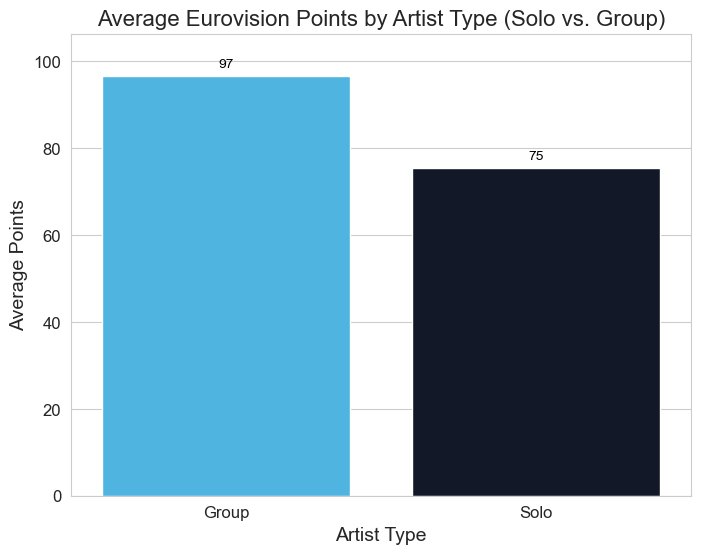

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19404\137532797.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


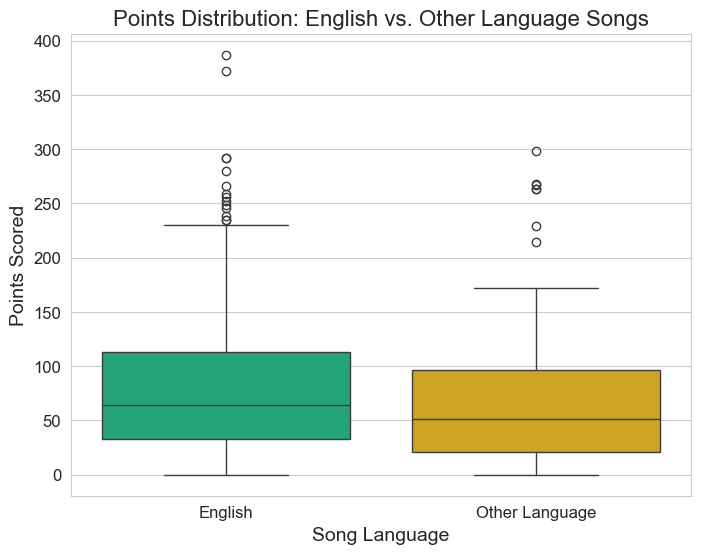

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19404\3325387101.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


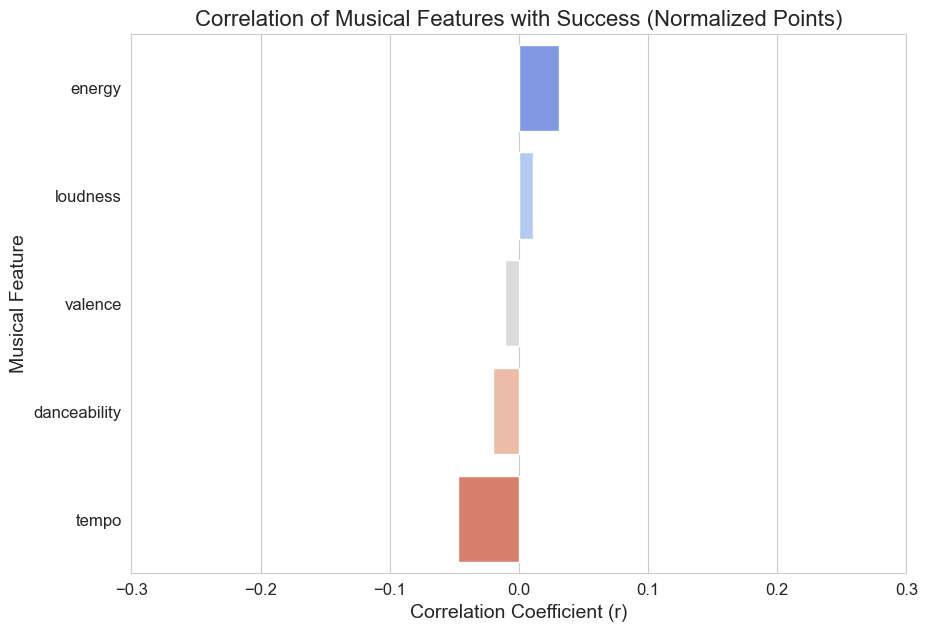

In [74]:
if 'data' in locals():
    viz_artist_type_performance()
    viz_english_language_impact()
    viz_musical_metrics_correlation()

In [75]:
data=data.drop(['Year','Points', 'Home.Away.Country','Region',
       'Home.Away.Region', 'Is.Final', 'Semi.Final.Number'], axis =1)

In [76]:
data.columns

Index(['Country', 'Artist', 'Song', 'Artist.gender', 'Group.Solo', 'Place',
       'Song.In.English', 'Song.Quality', 'Normalized.Points', 'energy',
       'duration', 'acousticness', 'danceability', 'tempo', 'speechiness',
       'key', 'liveness', 'time_signature', 'mode', 'loudness', 'valence',
       'Happiness', 'Song.Language'],
      dtype='object')

In [77]:
X = data.drop(['Normalized.Points'],axis =1)
y = data['Normalized.Points']

In [91]:
data = pd.get_dummies(X, drop_first=True)

In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [81]:
X.select_dtypes(include=["object"]).columns

Index(['Country', 'Artist', 'Song', 'Artist.gender', 'Group.Solo',
       'Song.Language'],
      dtype='object')

In [90]:
X = X.drop(columns=["Country", "Song", "Artist",'Artist.gender','Song.Language','Group.Solo'], errors="ignore")

In [93]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [94]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [95]:
y_pred = rf.predict(X_test)

In [96]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)

MAE: 0.0029678582367948982
RMSE: 0.004045570012526675
R² Score: 0.9859313479694702


In [97]:
import joblib

In [99]:
joblib.dump(rf, "rf_model.pkl")

['rf_model.pkl']

In [98]:
joblib.dump(X.columns, "model_columns.pkl")

['model_columns.pkl']